In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


<Axes: >

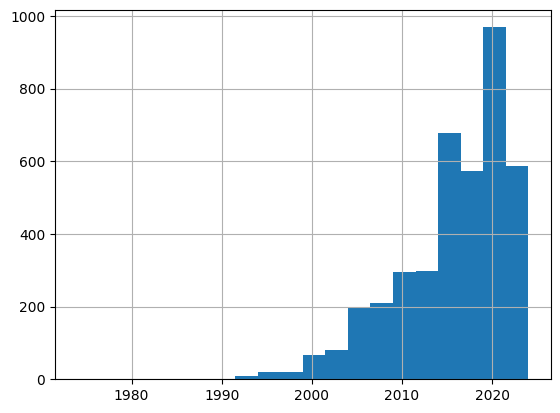

In [3]:
df["model_year"].hist(bins=20)

In [4]:
print(df["model_year"].mean())

2015.515589922674


In [5]:
price = df["price"]
price = price.str.replace("$","").str.replace(",","")
price = price.astype(int)
print(price)

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int64


In [6]:
df["price"] = price

In [7]:
# to get a new dataframe for the specific car type
df_hyundai = df[df["brand"] == "Hyundai"]
df_hyundai.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
25,Hyundai,Elantra N Base,2022,"11,650 mi.",Gasoline,276.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,32300
38,Hyundai,Tucson SE,2007,"16,200 mi.",Gasoline,173.0HP 2.7L V6 Cylinder Engine Gasoline Fuel,A/T,Gold,Beige,None reported,Yes,8200
84,Hyundai,Sonata Hybrid Limited,2015,"66,000 mi.",Hybrid,199.0HP 2.4L 4 Cylinder Engine Gas/Electric Hy...,A/T,White,Gray,At least 1 accident or damage reported,Yes,15900
90,Hyundai,Elantra N Base,2023,"3,800 mi.",Gasoline,276.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,White,Black,None reported,Yes,34000


In [8]:
print(df_hyundai["price"].mean())

18946.875


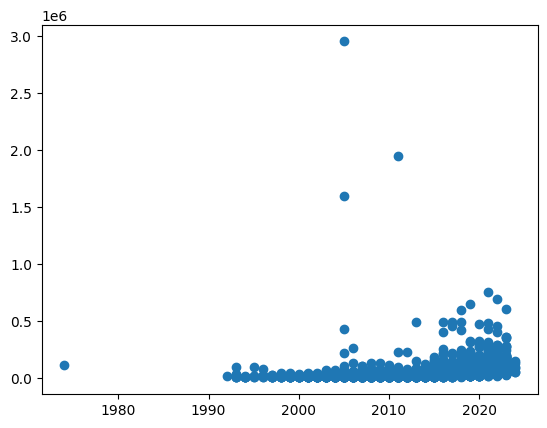

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df["model_year"], df["price"])
plt.show()

In [10]:
age = df["model_year"].max() - df["model_year"]
print(age)

0       11
1        3
2        2
3        9
4        3
        ..
4004     1
4005     2
4006     2
4007     4
4008     4
Name: model_year, Length: 4009, dtype: int64


In [11]:
milage = df["milage"]
milage = milage.str.replace("mi.","").str.replace(",","")
milage = milage.astype(int)
print(milage)

0       51000
1       34742
2       22372
3       88900
4        9835
        ...  
4004      714
4005    10900
4006     2116
4007    33000
4008    43000
Name: milage, Length: 4009, dtype: int64


In [12]:
accident_free = df["accident"] == "None reported"
accident_free = accident_free.astype(int)

In [13]:
accident_free

0       0
1       0
2       1
3       1
4       1
       ..
4004    1
4005    1
4006    1
4007    1
4008    0
Name: accident, Length: 4009, dtype: int64

In [14]:
import torch
from torch import nn

In [15]:
model = nn.Linear(3, 1)
loss_fn = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr = 1e-2)

In [16]:
X = torch.column_stack([torch.tensor(age, dtype=torch.float32), 
                        torch.tensor(milage, dtype=torch.float32),
                       torch.tensor(accident_free, dtype=torch.float32)])
Y = torch.tensor(price, dtype=torch.float32).reshape((-1, 1))

## Normalization

In [17]:
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)
X = (X - x_mean)/ x_std

In [18]:
y_mean = Y.mean()
y_std = Y.std()
Y = (Y - y_mean) / y_std

In [19]:
print(Y)

tensor([[-0.4352],
        [-0.0832],
        [ 0.1276],
        ...,
        [ 0.5901],
        [ 0.2343],
        [-0.0578]])


In [20]:
print(X)

tensor([[ 0.4121, -0.2623, -1.6270],
        [-0.8984, -0.5732, -1.6270],
        [-1.0622, -0.8097,  0.6145],
        ...,
        [-1.0622, -1.1970,  0.6145],
        [-0.7346, -0.6065,  0.6145],
        [-0.7346, -0.4153, -1.6270]])


100%|█████████████████| 2000/2000 [00:03<00:00, 520.25it/s]


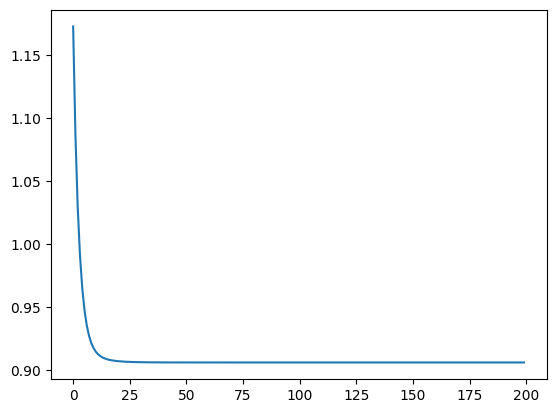

In [21]:
losses = []
for i in tqdm(range(2000)):
    optim.zero_grad()
    output = model(X)
    loss = loss_fn(output, Y)
    if i % 10 == 0:
        #print(loss)
        losses.append(loss.item())
    loss.backward()
    optim.step()  

plt.plot(losses)
plt.show()

In [23]:
x = torch.tensor([[6, 5000, 1],
                 [7, 10000, 0],
                 [5, 2000, 0]], dtype=torch.float32)

In [24]:
x_data = (x - x_mean)/x_std
print(x_data)

tensor([[-0.4070, -1.1419,  0.6145],
        [-0.2432, -1.0463, -1.6270],
        [-0.5708, -1.1993, -1.6270]])


In [25]:
prediction = model(x_data)

In [26]:
y_pred = prediction * y_std + y_mean

In [27]:
y_pred

tensor([[72179.7812],
        [65676.4688],
        [69584.3281]], grad_fn=<AddBackward0>)